# Data Preprocessing Step

Here we implement all possible data preprocessing utils that are going to be used before feature extraction

### Data fields:
- Id
- ResidentStatus
- Education1989Revision
- Education2003Revision
- EducationReportingFlag
- MonthOfDeath
- Sex
- AgeType
- Age
- AgeSubstitutionFlag
- AgeRecode52
- AgeRecode27
- AgeRecode12
- InfantAgeRecode22
- PlaceOfDeathAndDecedentsStatus
- MaritalStatus
- DayOfWeekOfDeath
- CurrentDataYear
- InjuryAtWork
- MannerOfDeath
- MethodOfDisposition
- Autopsy
- ActivityCode
- PlaceOfInjury
- Icd10Code
- CauseRecode358
- CauseRecode113
- InfantCauseRecode130
- CauseRecode39
- NumberOfEntityAxisConditions
- NumberOfRecordAxisConditions
- Race
- BridgedRaceFlag
- RaceImputationFlag
- RaceRecode3
- RaceRecode5
- HispanicOrigin
- HispanicOriginRaceRecode

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
# skipcols = (6, 15, 18, 20, 21, 24)
# usecols = [n for n in range(38) if n not in skipcols]

In [5]:
pd_data = pd.read_csv('data/DeathRecords.csv', index_col=0)

In [6]:
pd_data

,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,AgeRecode52,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,1,1,M,1,87,0,43,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,37,...,21,3,3,1,0,0,1,1,100,6
3,1,0,7,1,1,F,1,75,0,41,...,28,2,2,1,0,0,1,1,100,6
4,1,0,6,1,1,M,1,74,0,40,...,22,3,3,1,0,0,1,1,100,6
5,1,0,3,1,1,M,1,64,0,38,...,21,1,1,1,0,0,1,1,100,6
6,1,0,5,1,1,F,1,93,0,44,...,37,5,5,1,0,0,1,1,100,6
7,1,0,4,1,1,M,1,82,0,42,...,21,4,3,1,0,0,1,1,100,6
8,1,0,4,1,1,M,1,55,0,37,...,21,2,2,2,1,0,3,2,100,7
9,1,0,3,1,1,F,1,86,0,43,...,37,1,1,1,0,0,1,1,100,6


In [7]:
# activity_code = pd_data.ActivityCode[(pd_data.ActivityCode != 99) & (pd_data.ActivityCode != 9)]
# day_of_week = pd_data.DayOfWeekOfDeath[(pd_data.ActivityCode != 99) & (pd_data.ActivityCode != 9)]

activity_code = pd_data.ActivityCode[(pd_data.ActivityCode == 1)]
day_of_week = pd_data.DayOfWeekOfDeath[(pd_data.ActivityCode == 1)]

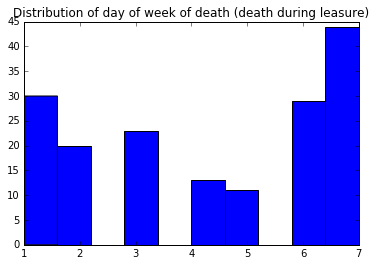

In [8]:
plt.hist(day_of_week)
plt.title("Distribution of day of week of death (death during leasure)")
plt.show()

In [9]:
pd_data.shape

(2631171, 37)

# Education
Categories we extract from the data about education

- 0: Unkown
- 1: 8th grade or less
- 2: 12th grade, no diploma
- 3: high school graduate or GED completed
- 4: some college credit, but no degree, Associate degree
- 5: Bachelor's degree
- 6: Master's degree or higher


In [10]:
# Eduction category

def education_category_89(category):
    if category <= 0:
        return 0
    elif category <= 8:
        return 1
    elif category <= 11:
        return 2
    elif category <= 12:
        return 3
    elif category <= 15:
        return 4
    elif category <= 16:
        return 5
    elif category <= 17:
        return 6
    else:
        return 0

def education_category_03(category):
    if category == 5:
        return 4
    elif category == 6:
        return 5
    elif category == 7 or category == 8:
        return 6
    elif category == 9:
        return 0
    else:
        return category
    

def education_category(record_type, category89, category03):
    if record_type == 0:
        return education_category_89(category89)
    if record_type == 1:
        return education_category_03(category03)

In [11]:
education_categories = pd_data.apply(
   lambda x: education_category(int(x['EducationReportingFlag']),
                                int(x['Education1989Revision']),
                                int(x['Education2003Revision'])), axis=1)

In [12]:
# from pickle import load
# education_categories = load(open("education_categories.pickle", "rb"))

In [13]:
from pickle import dump
dump(education_categories, open("education_categories.pickle", "wb"))

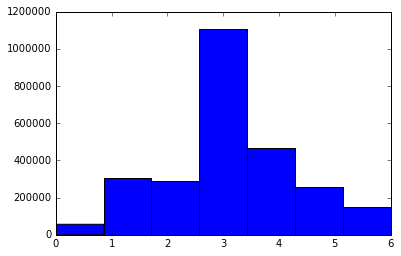

In [14]:
plt.hist(education_categories.as_matrix(), bins = 7)
plt.show()

# Sex
* 0: Male
* 1: Female

In [15]:
def sex_category(sex):
    if sex == 'M':
        return 0
    elif sex == 'F':
        return 1
    else:
        return 2

sex_categories = pd_data.apply(
    lambda x: sex_category(x["Sex"]), axis=1)

dump(sex_categories, open("sex_categories.pickle", "wb"))

In [16]:
sex_categories = load(open("sex_categories.pickle", "rb"))

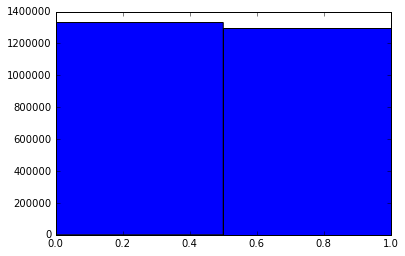

In [17]:
plt.hist(sex_categories.as_matrix(), bins = 2)
plt.show()

# Age
Age into 27 bins

* 01 : Under 1 month (includes not stated weeks, days, hours, and minutes)
* 02 : 1 month - 11 months (includes not stated months)
* 03 : 1 year
* 04 : 2 years
* 05 : 3 years
* 06 : 4 years
* 07 : 5 -  9 years
* 08 : 10 - 14 years
* 09 :  15 - 19 years
* 10 : 20 - 24 years
* 11 : 25 - 29 years
* 12 : 30 - 34 years
* 13 : 35 - 39 years
* 14 : 40 - 44 years
* 15 : 45 - 49 years
* 16 : 50 - 54 years
* 17 : 55 - 59 years
* 18 : 60 - 64 years
* 19 : 65 - 69 years
* 20 : 70 - 74 years 
* 21 : 75 - 79 years
* 22 : 80 - 84 years
* 23 : 85 - 89 years
* 24 : 90 - 94 years
* 25 : 95 - 99 years
* 26 : 100 years and over
* 27 : Age not stated

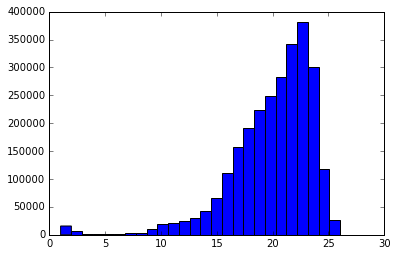

In [18]:
plt.hist(pd_data["AgeRecode27"].as_matrix(), bins = 27)
plt.show()

# Race
Race encoded into 3 bins

* 1 : White
* 2 : Races other than White or Black
* 3 : Black

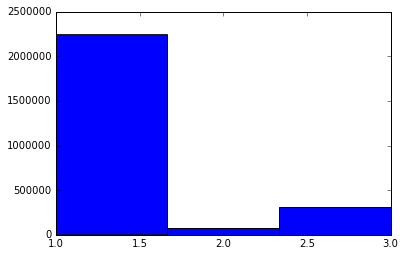

In [19]:
plt.hist(pd_data["RaceRecode3"].as_matrix(), bins = 3)
plt.show()

# Cause of death
Cause of death into 39 bins.
See http://www.cdc.gov/nchs/data/dvs/Record_Layout_2014.pdf p19.

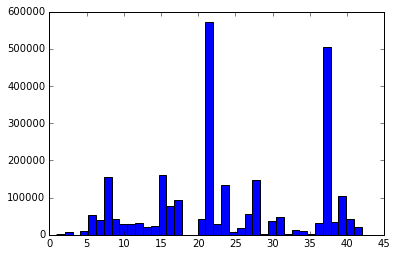

In [20]:
plt.hist(pd_data["CauseRecode39"].as_matrix(), bins = 39)
plt.show()

# Martial status
* 0 : Never married, single
* 1 : Married
* 2 : Widowed
* 3 : Divorced
* 4 : Marital Status unknown

In [21]:
def status_category(status):
    if status == 'S':
        return 0
    elif status == 'M':
        return 1
    elif status == 'W':
        return 2
    elif status == 'D':
        return 3
    else:
        return 4

status_categories = pd_data.apply(
    lambda x: status_category(x["MaritalStatus"]), axis=1)

dump(status_categories, open("status_categories.pickle", "wb"))

In [22]:
status_categories = load(open("status_categories.pickle", "rb"))

In [23]:
status_categories.shape

(2631171,)

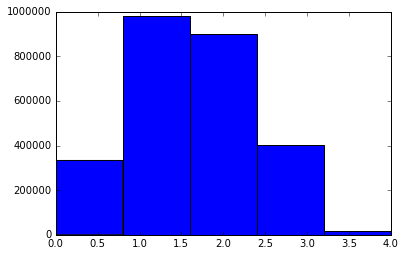

In [24]:
plt.hist(status_categories.as_matrix(), bins = 5)
plt.show()

In [25]:
month_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['MonthOfDeath'],
                  columns=['CauseRecode39'], aggfunc=np.sum)

In [26]:
normalized_month_cause = month_cause.copy()
for column in month_cause.columns:
    normalized_month_cause[column] = month_cause[column] / sum(month_cause[column])

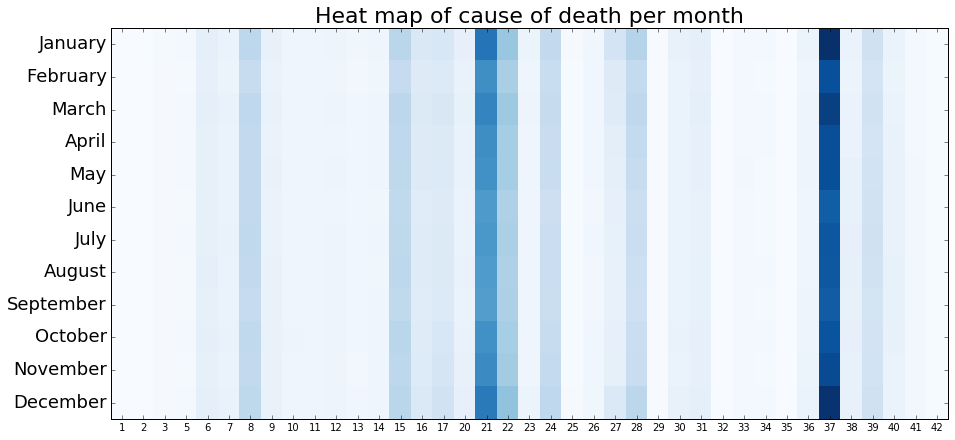

In [27]:

fig, ax = plt.subplots()
heatmap = ax.pcolor(month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(month_cause.columns)
ax.set_yticks(np.arange(12) + 0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])

for label in (ax.get_yticklabels()):
    label.set_fontsize(18)


plt.title("Heat map of cause of death per month")
    
ax.title.set_fontsize(22)

pp = PdfPages('month_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

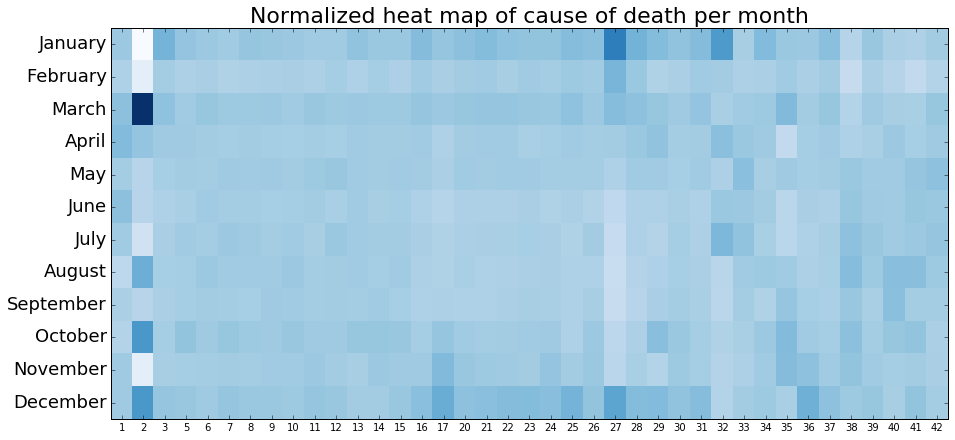

In [28]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39)+0.5)
ax.set_xticklabels(normalized_month_cause.columns)
ax.set_yticks(np.arange(12)+0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])
# plt.title(" heat map of cause of death per month")

for label in (ax.get_yticklabels()):
    label.set_fontsize(18)


plt.title("Normalized heat map of cause of death per month")
    
ax.title.set_fontsize(22)

pp = PdfPages('normalized_month_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()


plt.show()

In [29]:
age_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['AgeRecode27'],
                  columns=['CauseRecode39'], aggfunc=np.sum)
age_cause[np.isnan(age_cause)] = 0

In [30]:
normalized_age_cause = age_cause.copy()
for column in age_cause.columns:
    normalized_age_cause[column] = age_cause[column] / sum(age_cause[column])

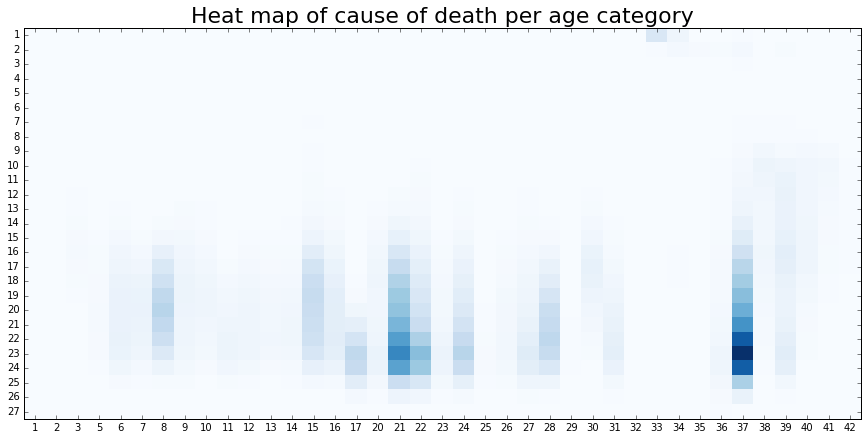

In [31]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)


plt.title("Heat map of cause of death per age category")
    
ax.title.set_fontsize(22)

pp = PdfPages('age_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

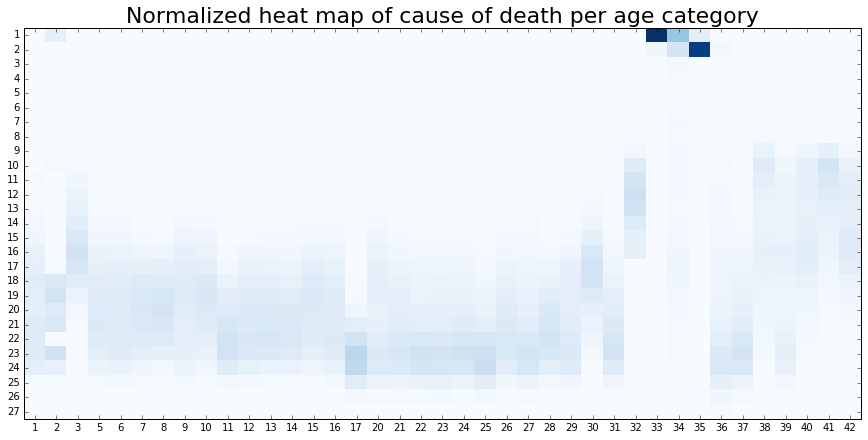

In [ ]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)


plt.title("Normalized heat map of cause of death per age category")
    
ax.title.set_fontsize(22)

pp = PdfPages('age_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

In [ ]:
from sklearn.cluster.bicluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=3)
model.fit(normalized_age_cause)
# score = consensus_score(model.biclusters_,
#                         (rows[:, row_idx], columns[:, col_idx]))

# print("consensus score: {:.3f}".format(score))

fit_data = normalized_age_cause[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()